# Era5 Dataset

Here, we will use the ERA5 python API to gain access re-analysis data for pre-training the diffusion model. Here, we will use the analysis-ready and cloud optimized version of ERA5 available on [Google Cloud Platform](https://github.com/google-research/arco-era5?tab=readme-ov-file).

In [448]:

import torch
import matplotlib.pyplot as plt
from notebook_setup import device
import numpy as np
# change device to whatever you want to use
device = torch.device('cuda:0')
%load_ext autoreload
%autoreload 2

torch.manual_seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0.25° Pressure and Surface Level Data

This is a super-set of the data used in NeuralGCMs and GraphCast.

In [452]:
%autoreload 2
from data.climate.regional_dataset import ERA5RegionalDataset
from datetime import timedelta

dset_temp = ERA5RegionalDataset(
    NS_length=6000000,
    EW_length=6000000,
    total_count=100,
    timedelta_size=timedelta(hours=0.77),
    attribute='2m_temperature',
)
dset_wind = ERA5RegionalDataset(
    NS_length=6000000,
    EW_length=6000000,
    total_count=100,
    timedelta_size=timedelta(hours=0.77),
    attribute='ocean_surface_stress_equivalent_10m_neutral_wind_speed',
)

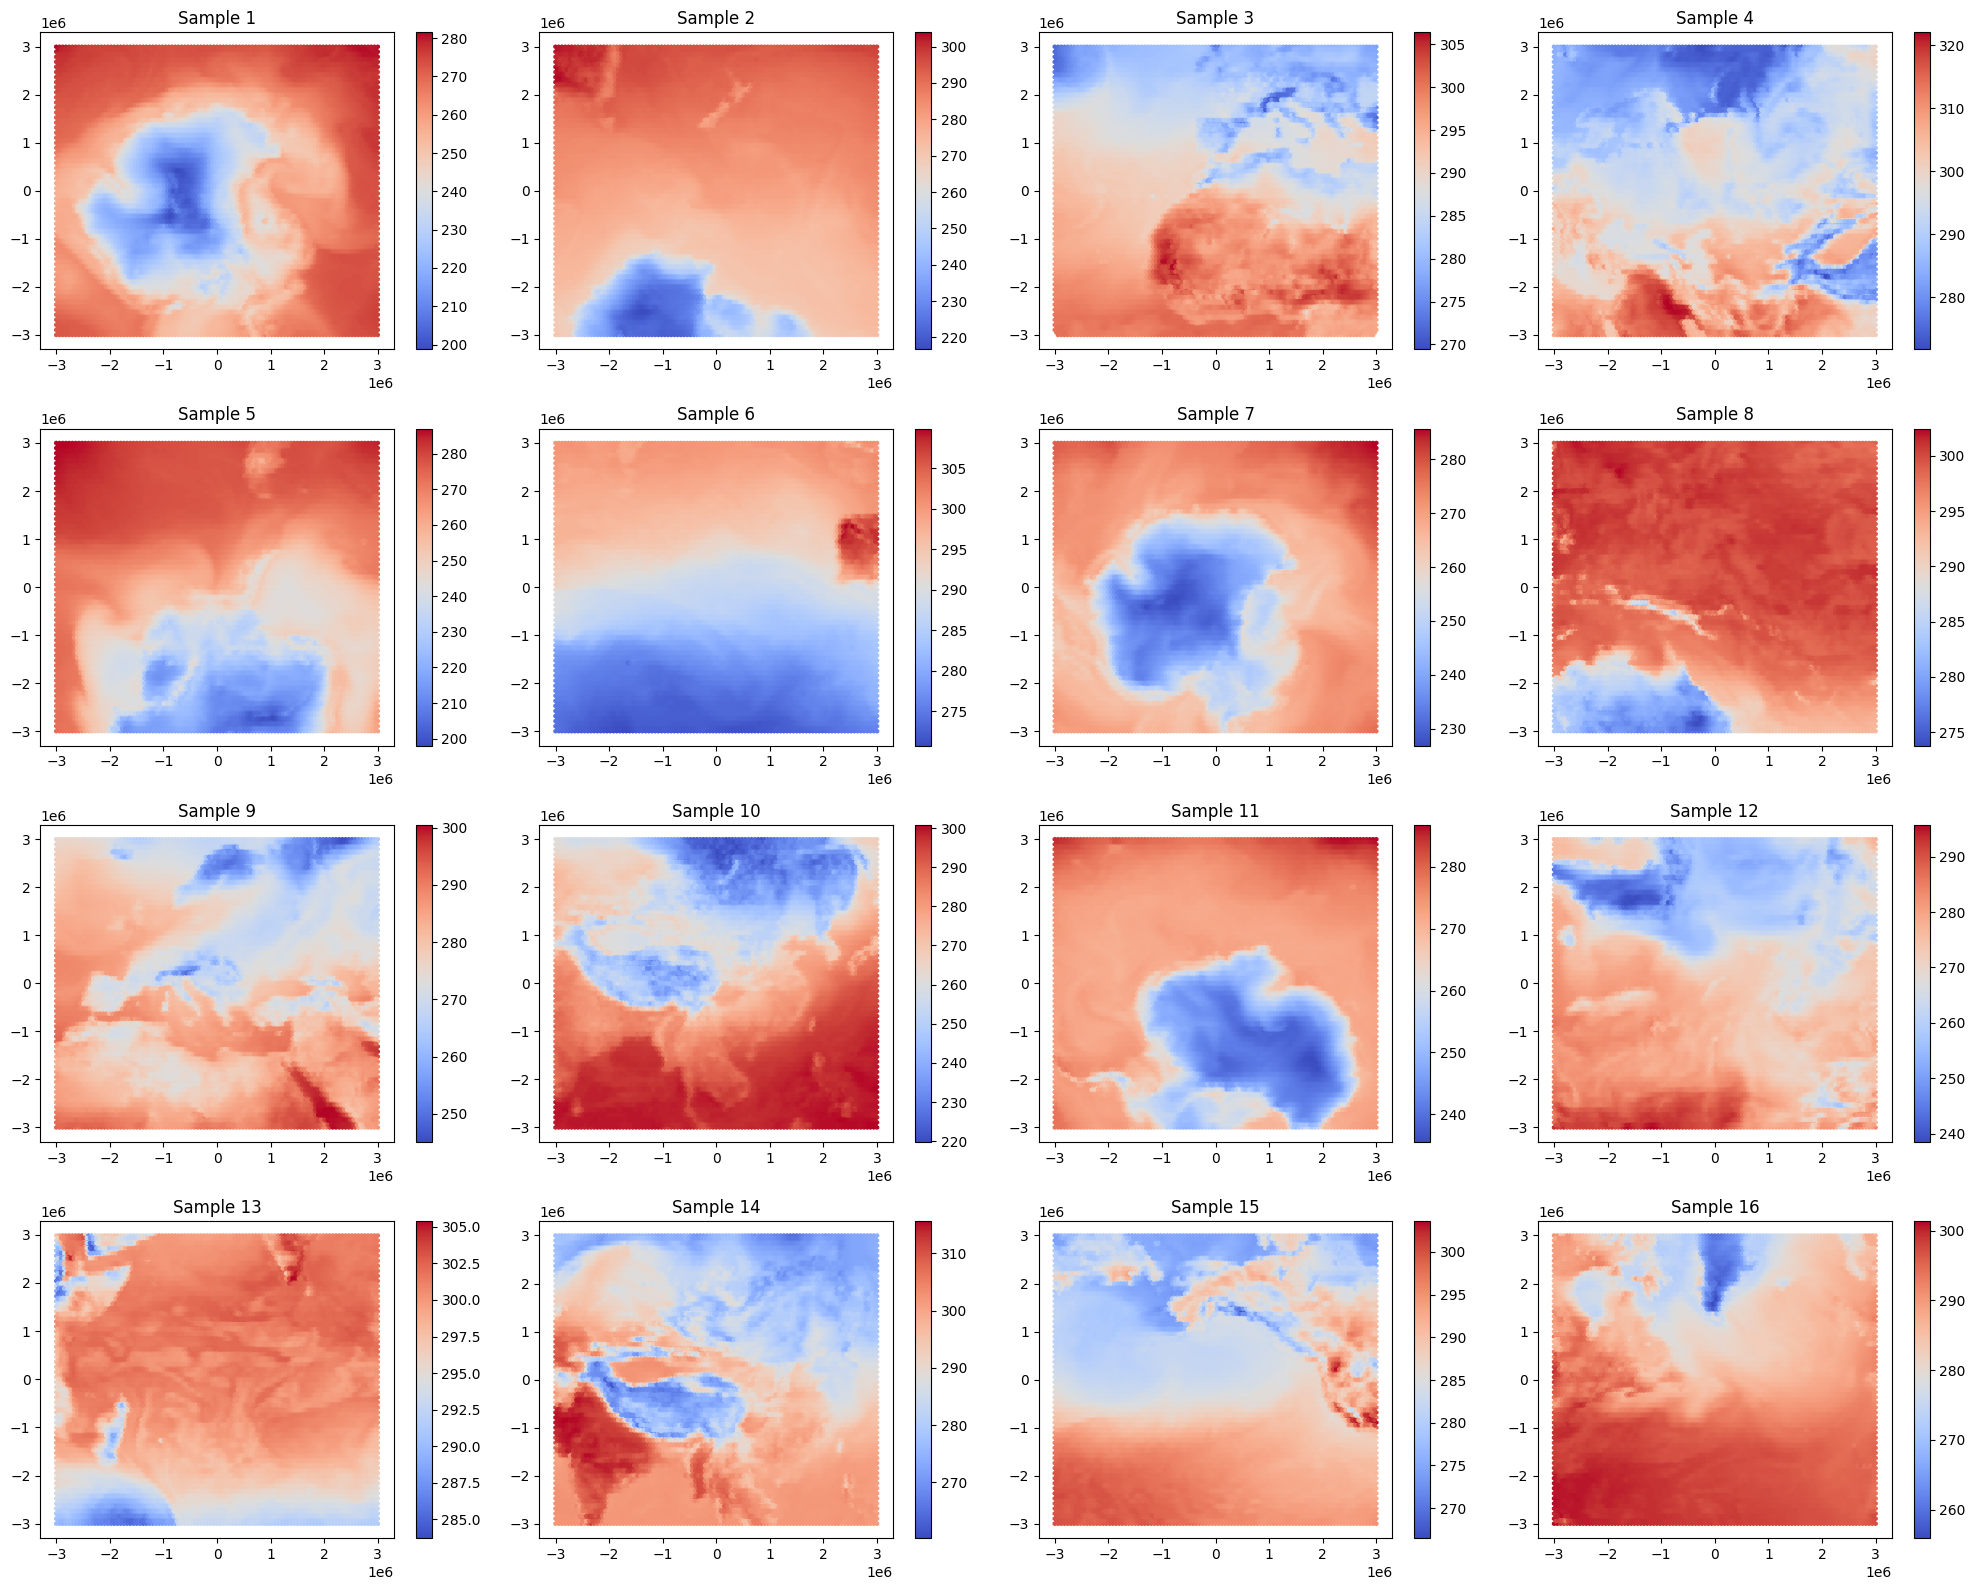

In [453]:
import matplotlib.pyplot as plt
# Plotting code
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(16):
    x, y, time, temp, _, _, _ = dset_temp[i]
    coor = i // 4, i % 4
    hb = ax[coor].hexbin(x, y, C=temp, gridsize=100, cmap='coolwarm')
    cb = plt.colorbar(hb, ax=ax[coor])
    ax[coor].set_title(f"Sample {i+1}")

plt.tight_layout()
plt.show()


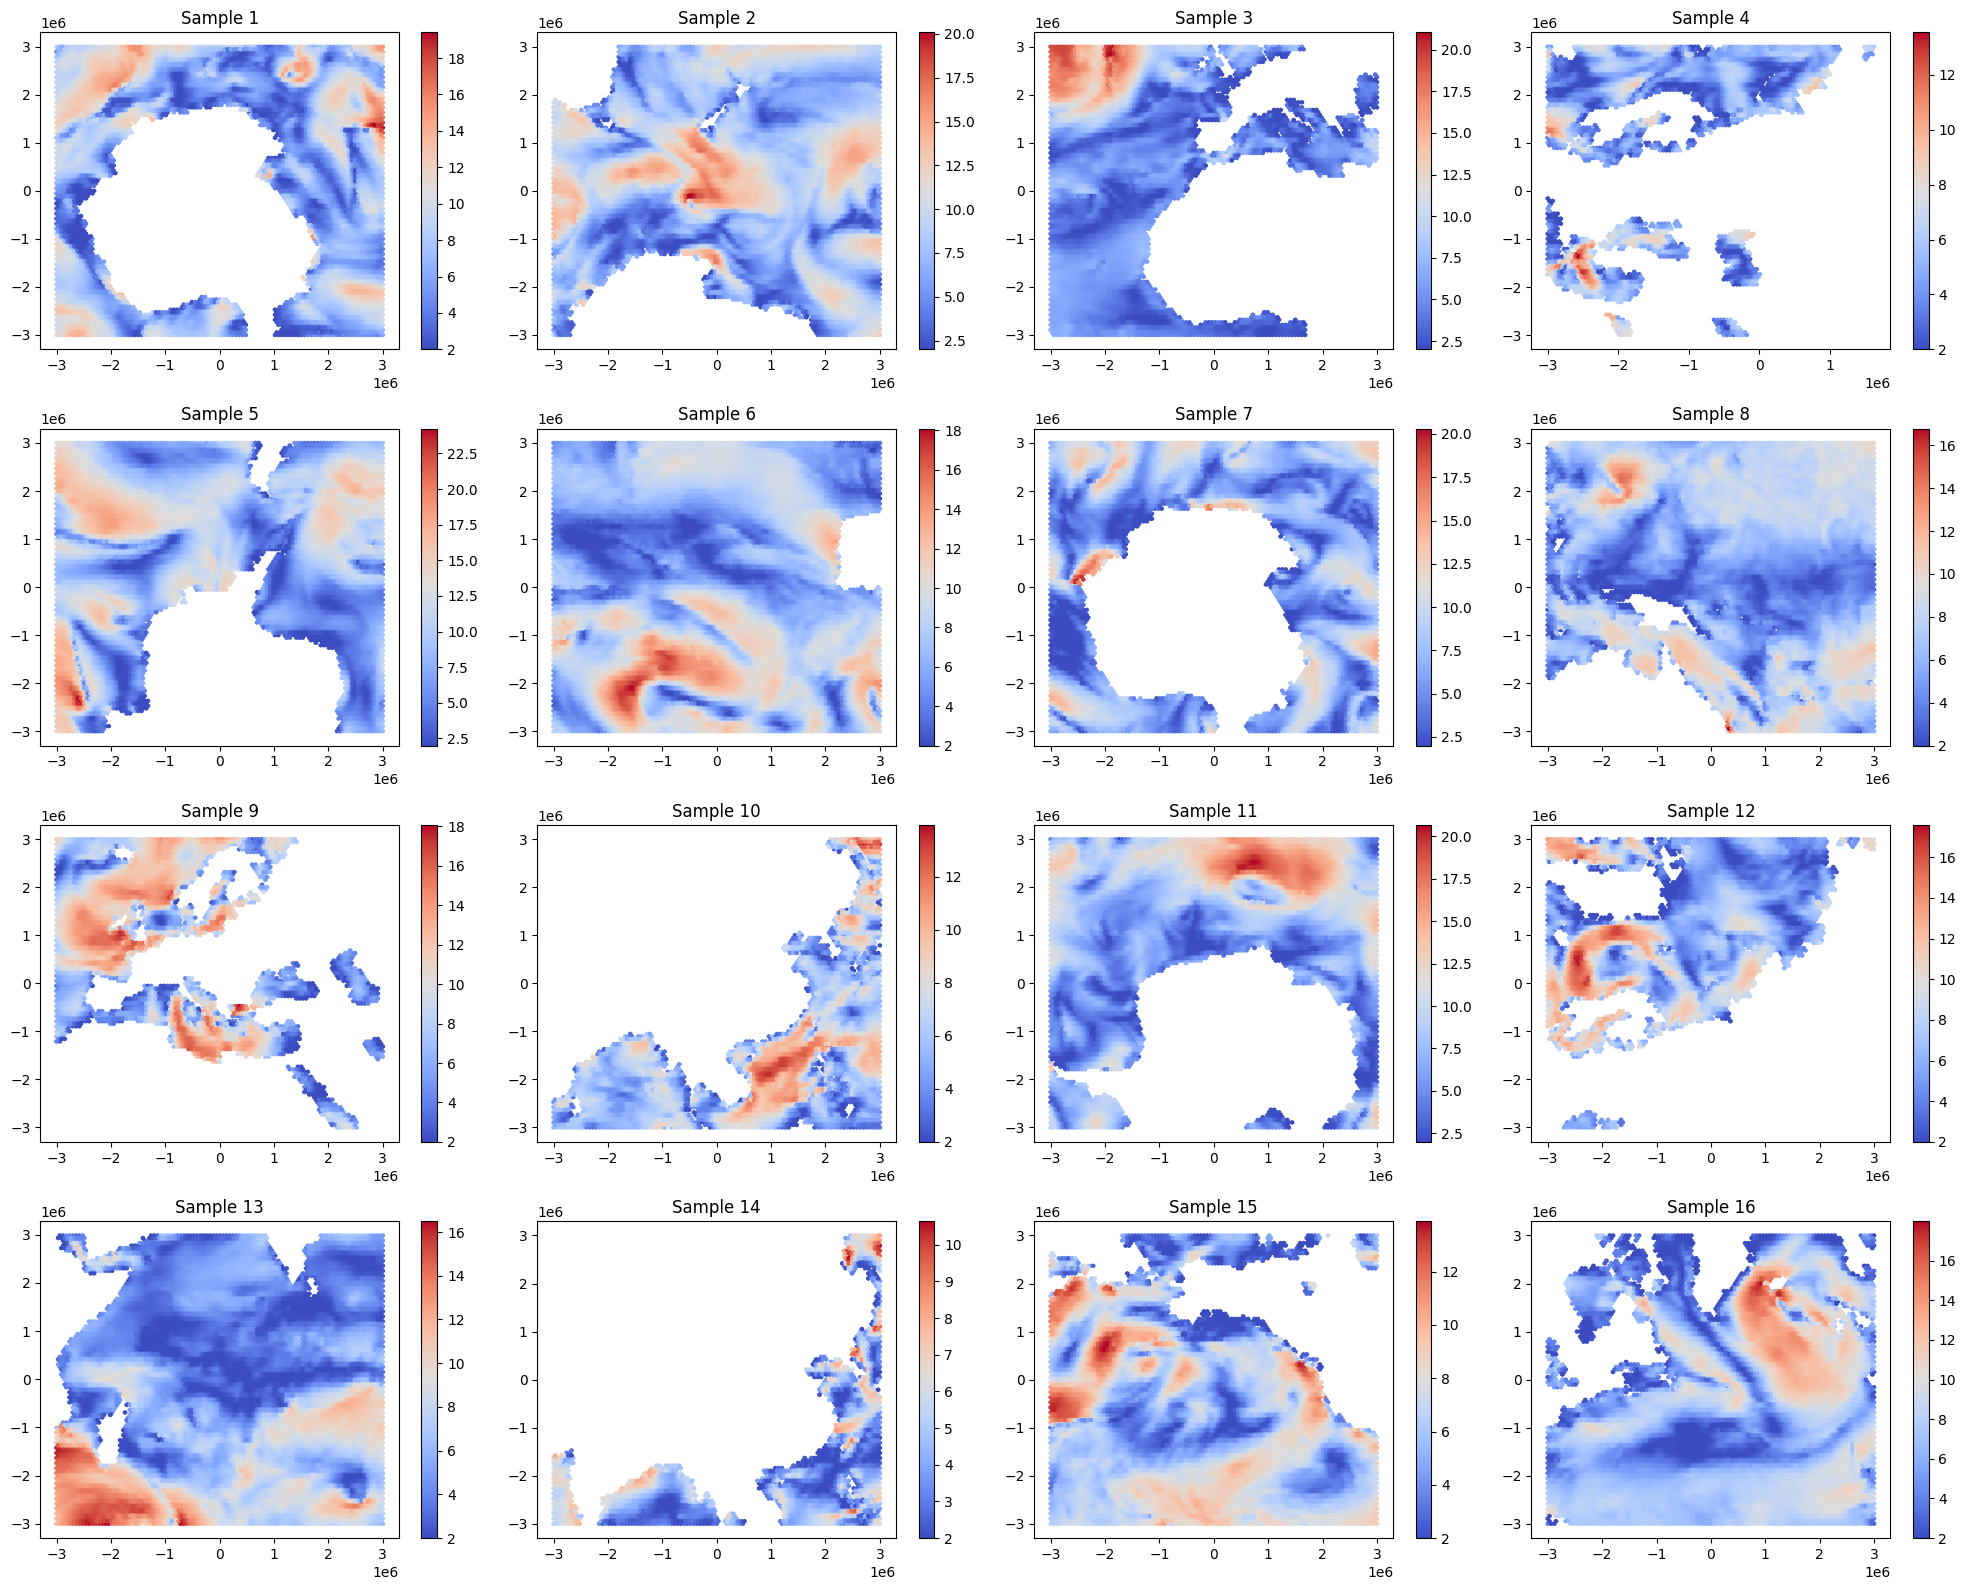

In [454]:
import matplotlib.pyplot as plt
# Plotting code
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(16):
    x, y, time, wind, _, _, _ = dset_wind[i]
    coor = i // 4, i % 4
    hb = ax[coor].hexbin(x, y, C=wind, gridsize=100, cmap='coolwarm')
    cb = plt.colorbar(hb, ax=ax[coor])
    ax[coor].set_title(f"Sample {i+1}")

plt.tight_layout()
plt.show()


In [455]:
%autoreload 2
from data.climate.regional_dataset import ERA5RegionalDataset
from datetime import timedelta

temp_over_time = ERA5RegionalDataset(
    NS_length=6000000,
    EW_length=6000000,
    total_count=100,
    timedelta_size=timedelta(hours=24),
    attribute='2m_temperature',
)

In [456]:
x, y, time, temp, _, _, _ = temp_over_time[3]


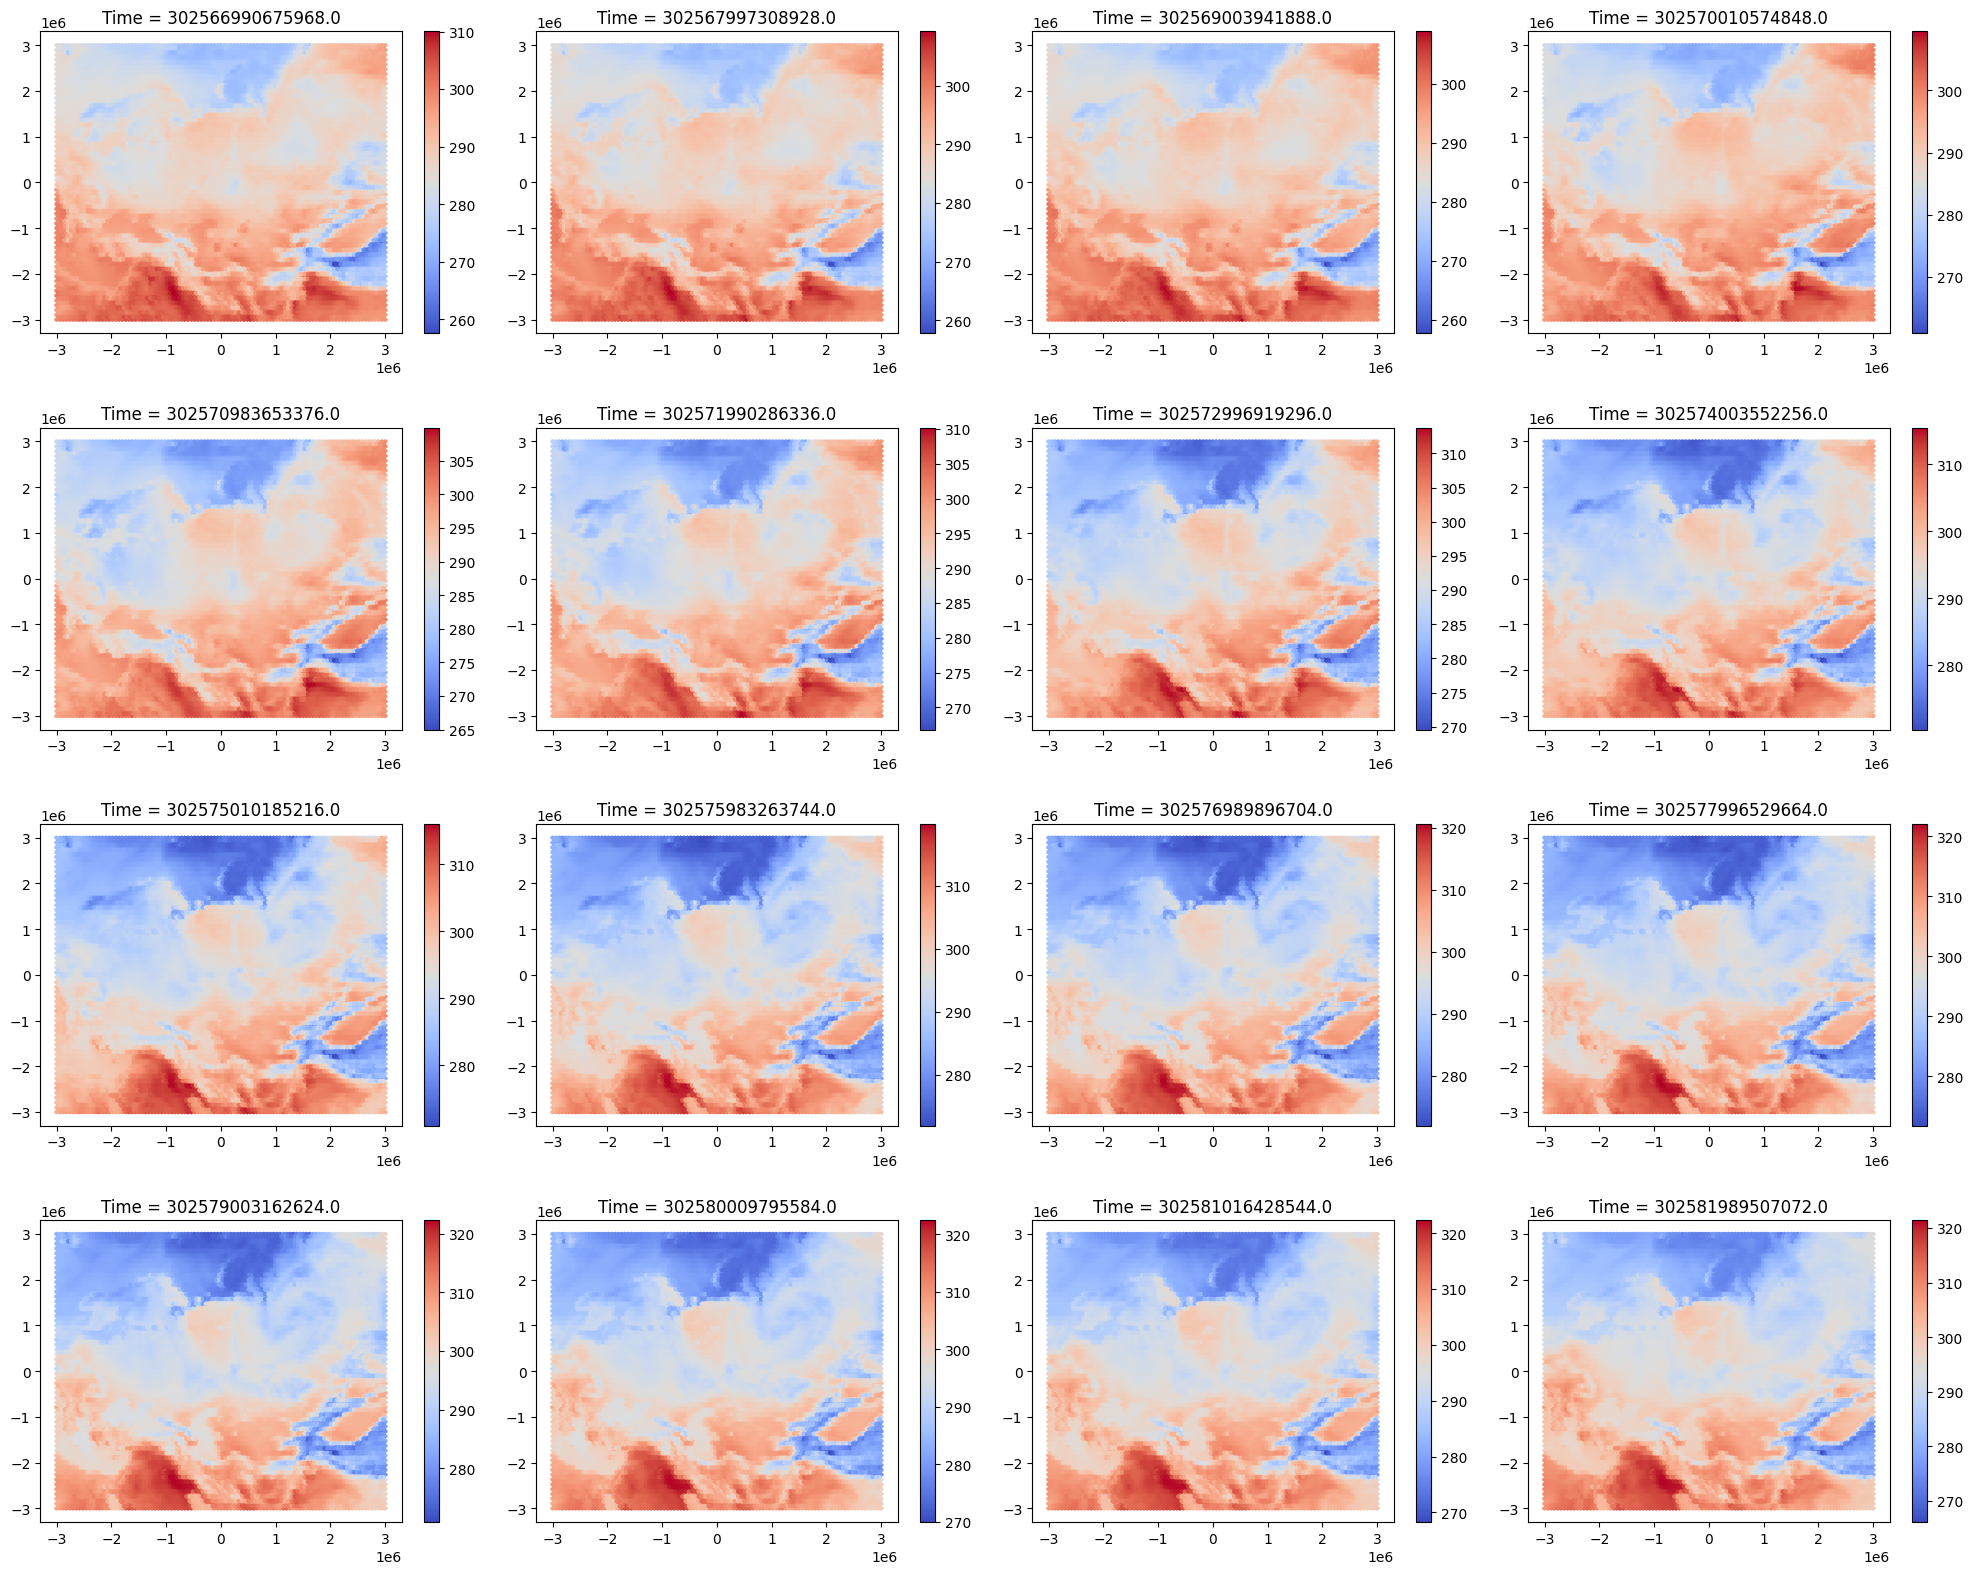

In [457]:
import matplotlib.pyplot as plt
# Plotting code
fig, ax = plt.subplots(4, 4, figsize=(20, 16))
all_times = torch.unique(time)

for i in range(16):
    msk = time == all_times[i]
    coor = i // 4, i % 4
    hb = ax[coor].hexbin(x[msk], y[msk], C=temp[msk], gridsize=100, cmap='coolwarm')
    cb = plt.colorbar(hb, ax=ax[coor])
    ax[coor].set_title(f"Time = {all_times[i]}")

plt.tight_layout()
plt.show()
